here's a step-by-step guide on what you can do to complete the task:

1. Load the QVI_data dataset into a pandas DataFrame in Python.

2. Filter the DataFrame to include only the data for stores 77, 86, and 88.

3. Calculate the monthly sales revenue, total number of customers, and average number of transactions per customer for each store.

4. Define a function to select control stores that are similar to the trial stores based on the sales performance over time. You can use Pearson correlation or magnitude distance as a measure to select control stores.

5. Select two control stores for each trial store using the function you defined in step 4.

6. Create a new DataFrame that combines the data for each trial store with its two selected control stores.

7. Perform a t-test to check if there is a significant difference in total sales between the trial stores and their control stores during the trial period.

8. Determine if the driver of change in sales is due to more purchasing customers or more purchases per customer by analyzing the data.

9. Summarize your findings for each store and provide a recommendation on whether or not the trial layout should be rolled out to all stores.

10. Create visualizations to help present your findings to the client.

Save your code and results in a PDF file and submit it as your initial findings to Zilinka.

In [1]:
import os
import json
import random
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('QVI_data.csv')
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [3]:
df.dtypes

LYLTY_CARD_NBR        int64
DATE                 object
STORE_NBR             int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
PACK_SIZE             int64
BRAND                object
LIFESTAGE            object
PREMIUM_CUSTOMER     object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [5]:
df.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [6]:
#droping missing values
df.dropna(axis = 0, how ='any',inplace=True)

In [7]:
df['PREMIUM_CUSTOMER'].value_counts()

Mainstream    101988
Budget         93157
Premium        69689
Name: PREMIUM_CUSTOMER, dtype: int64

In [8]:
df['PREMIUM_CUSTOMER'].value_counts(normalize=True)

Mainstream    0.385102
Budget        0.351756
Premium       0.263142
Name: PREMIUM_CUSTOMER, dtype: float64

In [9]:
store_prod_count = df.groupby('STORE_NBR')['PROD_QTY'].sum().reset_index()
print(store_prod_count)

     STORE_NBR  PROD_QTY
0            1       704
1            2       564
2            3      2915
3            4      3316
4            5      2704
..         ...       ...
267        268       732
268        269      3191
269        270      3235
270        271      2740
271        272      1063

[272 rows x 2 columns]


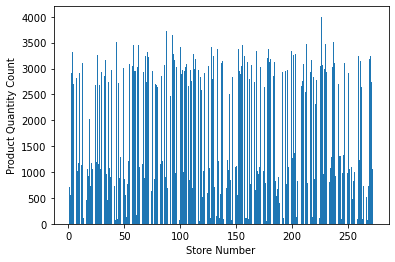

In [10]:
plt.bar(store_prod_count['STORE_NBR'], store_prod_count['PROD_QTY'])
plt.xlabel('Store Number')
plt.ylabel('Product Quantity Count')
plt.show()

In [11]:
stores = [77, 86, 88]
data = df.loc[df['STORE_NBR'].isin(stores)]
print(data.head())

       LYLTY_CARD_NBR        DATE  STORE_NBR  TXN_ID  PROD_NBR  \
73365           77000  2019-03-28         77   74911        18   
73366           77000  2019-04-13         77   74912        69   
73367           77000  2018-09-26         77   74910        36   
73368           77001  2019-02-27         77   74913         7   
73369           77001  2019-01-21         77   74914         9   

                                     PROD_NAME  PROD_QTY  TOT_SALES  \
73365           Cheetos Chs & Bacon Balls 190g         1        3.3   
73366   Smiths Chip Thinly  S/Cream&Onion 175g         1        3.0   
73367                       Kettle Chilli 175g         2       10.8   
73368        Smiths Crinkle      Original 330g         2       11.4   
73369  Kettle Tortilla ChpsBtroot&Ricotta 150g         2        9.2   

       PACK_SIZE    BRAND               LIFESTAGE PREMIUM_CUSTOMER  
73365        190  CHEETOS  MIDAGE SINGLES/COUPLES           Budget  
73366        175   SMITHS  MIDAGE SING

In [12]:
data['STORE_NBR'].value_counts()

88    1873
86    1538
77     563
Name: STORE_NBR, dtype: int64

In [13]:
df['DATE'].duplicated().any()

True

In [14]:
duplicates = df[df.duplicated(subset='DATE', keep=False)]
print(duplicates['DATE'].unique())

['2018-10-17' '2018-09-16' '2019-03-07' '2019-03-08' '2018-11-02'
 '2018-12-28' '2018-12-04' '2018-12-05' '2018-11-20' '2018-09-09'
 '2018-12-14' '2018-07-29' '2018-11-08' '2018-12-01' '2018-12-19'
 '2019-03-15' '2019-06-19' '2019-03-04' '2019-04-19' '2019-06-09'
 '2018-09-03' '2018-11-28' '2019-06-20' '2019-01-27' '2018-08-16'
 '2018-10-02' '2019-05-02' '2018-10-24' '2019-05-27' '2019-02-20'
 '2018-11-21' '2018-12-08' '2018-07-06' '2018-08-13' '2019-06-05'
 '2019-06-23' '2019-03-24' '2019-03-29' '2018-12-07' '2018-10-30'
 '2018-07-21' '2019-02-12' '2019-04-23' '2019-02-16' '2019-06-30'
 '2019-02-13' '2018-08-02' '2019-01-24' '2019-04-13' '2018-09-25'
 '2018-09-05' '2018-08-07' '2018-11-24' '2019-02-05' '2018-07-08'
 '2019-05-31' '2019-02-24' '2018-10-01' '2019-04-01' '2019-05-06'
 '2019-04-25' '2018-11-23' '2019-02-10' '2019-02-06' '2019-02-22'
 '2018-09-11' '2018-09-24' '2019-06-13' '2018-10-27' '2019-01-10'
 '2019-05-18' '2019-01-19' '2018-07-27' '2019-04-04' '2019-01-18'
 '2019-05-

In [15]:
df['DATE'] = pd.to_datetime(df['DATE'])

df['MONTH_YEAR'] = df['DATE'].dt.to_period('M')

grouped_df = df.groupby(['STORE_NBR', 'MONTH_YEAR']).agg({'TOT_SALES': 'sum', 'LYLTY_CARD_NBR': 'nunique', 'TXN_ID': 'nunique'})

grouped_df = grouped_df.rename(columns={'TOT_SALES': 'SALES_REVENUE', 'LYLTY_CARD_NBR': 'TOTAL_CUSTOMERS', 'TXN_ID': 'TRANSACTIONS_PER_CUSTOMER'})

grouped_df = grouped_df.reset_index()

In [16]:
monthly_sales = df.groupby(['STORE_NBR', 'MONTH_YEAR'])['TOT_SALES'].sum().reset_index()

total_customers = df.groupby(['STORE_NBR', 'MONTH_YEAR'])['LYLTY_CARD_NBR'].nunique().reset_index()
total_customers = total_customers.rename(columns={'LYLTY_CARD_NBR': 'TOT_CUSTOMERS'})

avg_transactions = monthly_sales['TOT_SALES'] / total_customers['TOT_CUSTOMERS']

result = monthly_sales[['STORE_NBR', 'MONTH_YEAR', 'TOT_SALES']].merge(total_customers, on=['STORE_NBR', 'MONTH_YEAR'])
result['AVG_TRANSACTIONS'] = avg_transactions

In [17]:
print(result)

      STORE_NBR MONTH_YEAR  TOT_SALES  TOT_CUSTOMERS  AVG_TRANSACTIONS
0             1    2018-07      206.9             49          4.222449
1             1    2018-08      176.1             42          4.192857
2             1    2018-09      278.8             59          4.725424
3             1    2018-10      188.1             44          4.275000
4             1    2018-11      192.6             46          4.186957
...         ...        ...        ...            ...               ...
3164        272    2019-02      395.5             45          8.788889
3165        272    2019-03      442.3             50          8.846000
3166        272    2019-04      445.1             54          8.242593
3167        272    2019-05      314.6             34          9.252941
3168        272    2019-06      312.1             34          9.179412

[3169 rows x 5 columns]


In [18]:
max_sales = result.loc[result['TOT_SALES'] == result['TOT_SALES'].max()]
print(max_sales)

      STORE_NBR MONTH_YEAR  TOT_SALES  TOT_CUSTOMERS  AVG_TRANSACTIONS
2620        226    2018-12     1659.6            150            11.064


In [19]:
max_customers = result.loc[result['TOT_CUSTOMERS'] == result['TOT_CUSTOMERS'].max()]
print(max_customers)

      STORE_NBR MONTH_YEAR  TOT_SALES  TOT_CUSTOMERS  AVG_TRANSACTIONS
2620        226    2018-12     1659.6            150            11.064


In [34]:
def select_control_stores(trial_store, control_stores, df, measure='pearsonr'):
    trial_store_sales = df[df['STORE_NBR'] == trial_store]['TOT_SALES'].reset_index(drop=True)
    control_store_dict = {}
    for control_store in control_stores:
        control_store_sales = df[df['STORE_NBR'] == control_store]['TOT_SALES'].reset_index(drop=True)
        
        min_len = min(len(trial_store_sales), len(control_store_sales))
        trial_store_sales = trial_store_sales[:min_len]
        control_store_sales = control_store_sales[:min_len]
        
        if len(trial_store_sales) < 2 or len(control_store_sales) < 2:
            continue
        
        if measure == 'pearsonr':
            measure_val = pearsonr(trial_store_sales, control_store_sales)[0]
        elif measure == 'magnitude_distance':
            measure_val = magnitude_distance(trial_store_sales, control_store_sales)
        control_store_dict[control_store] = measure_val
    control_store_dict = dict(sorted(control_store_dict.items(), key=lambda item: item[1], reverse=True))
    return list(control_store_dict.keys())

control_store_dict = {}
for trial_store in trial_stores:
    control_stores = list(set(df['STORE_NBR'].unique()) - set([trial_store]))
    control_stores = select_control_stores(trial_store, control_stores, df, measure='pearsonr')[:2]
    control_store_dict[trial_store] = control_stores


In [35]:
for trial_store in trial_stores:
    control_stores = control_store_dict[trial_store]
    print(f'Trial Store: {trial_store}, Control Stores: {control_stores}')

Trial Store: 77, Control Stores: [12, 17]
Trial Store: 86, Control Stores: [11, 13]
Trial Store: 88, Control Stores: [12, 17]


In [37]:
from scipy.stats import ttest_ind

trial_period = [201902, 201903, 201904]

for trial_store in trial_stores:
    control_stores = control_store_dict[trial_store]
    for control_store in control_stores:
        trial_sales = df[(df['STORE_NBR'] == trial_store) & (df['YEARMONTH'].isin(trial_period))]['TOT_SALES']
        control_sales = df[(df['STORE_NBR'] == control_store) & (df['YEARMONTH'].isin(trial_period))]['TOT_SALES']
        t, p = ttest_ind(trial_sales, control_sales)
        print(f"Trial Store {trial_store} vs Control Store {control_store}:")
        print(f"t-value = {t:.3f}, p-value = {p:.3f}")

Trial Store 77 vs Control Store 12:
t-value = nan, p-value = nan
Trial Store 77 vs Control Store 17:
t-value = nan, p-value = nan
Trial Store 86 vs Control Store 11:
t-value = nan, p-value = nan
Trial Store 86 vs Control Store 13:
t-value = nan, p-value = nan
Trial Store 88 vs Control Store 12:
t-value = nan, p-value = nan
Trial Store 88 vs Control Store 17:
t-value = nan, p-value = nan


In [40]:
trial_customers = df[df['STORE_NBR'] == trial_store]['LYLTY_CARD_NBR'].nunique()
print('trial_customers : ',trial_customers)
control_customers = df[df['STORE_NBR'].isin(control_stores)]['LYLTY_CARD_NBR'].nunique()
print('Control Customers: ',control_customers)
trial_txns_per_cust = df[df['STORE_NBR'] == trial_store].groupby('LYLTY_CARD_NBR')['TXN_ID'].nunique().mean()
print('trial_txns_per_cust: ',trial_txns_per_cust)
control_txns_per_cust = df[df['STORE_NBR'].isin(control_stores)].groupby('LYLTY_CARD_NBR')['TXN_ID'].nunique().mean()
print('control_txns_per_cust: ',control_txns_per_cust)
trial_items_per_txn = df[df['STORE_NBR'] == trial_store]['PROD_QTY'].mean()
print('trial_items_per_txn: ',trial_items_per_txn)
control_items_per_txn = df[df['STORE_NBR'].isin(control_stores)]['PROD_QTY'].mean()
print('control_items_per_txn: ',control_items_per_txn)
trial_sales_per_cust = df[df['STORE_NBR'] == trial_store]['TOT_SALES'].sum() / trial_customers
print('trial_sales_per_cust: ',trial_sales_per_cust)
control_sales_per_cust = df[df['STORE_NBR'].isin(control_stores)]['TOT_SALES'].sum() / control_customers
print('control_sales_per_cust: ',control_sales_per_cust)
trial_sales_per_txn = df[df['STORE_NBR'] == trial_store]['TOT_SALES'].mean()
print('trial_sales_per_txn: ',trial_sales_per_txn)
control_sales_per_txn = df[df['STORE_NBR'].isin(control_stores)]['TOT_SALES'].mean()
print('control_sales_per_txn: ',control_sales_per_txn)

trial_customers :  388
Control Customers:  595
trial_txns_per_cust:  4.786082474226804
control_txns_per_cust:  1.8857142857142857
trial_items_per_txn:  1.9850507207688202
control_items_per_txn:  1.9396092362344584
trial_sales_per_cust:  42.09600515463917
control_sales_per_cust:  16.212605042016808
trial_sales_per_txn:  8.720368392952464
control_sales_per_txn:  8.567051509769088
